In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import sys
sys.path.insert(0, '../mvTCR')
import tcr_embedding.utils_training as utils

Model trained with weight 1

In [2]:
# Put the .h5ad file read below in a folder named 'data' and put the folder 'data' in the 'mvTCR' folder.
# This way you won't get an error from the utils.load_data function
adata = utils.load_data('09_tcr_annotation_A_B_with_gender_data.h5ad')
#Put the best_model_by_metric.pt file in the mvTCR folder
model = utils.load_model(adata, path_model = 'best_model_by_metric_weight1.pt')

In [3]:
latent_moe = model.get_latent(adata, metadata=['clonotype', 'Age', 'Source', 'Sample'], return_mean=True)

In [4]:
import os
os.chdir('C:/Users/Gheorghe Pascu/OneDrive - tum.de/WiSe 21-22/Computational_Methods_in_Single_Cell_Biology/T_cell_project/') # where the folder 'data' can be found
cwd = os.getcwd()
print(cwd)

C:\Users\Gheorghe Pascu\OneDrive - tum.de\WiSe 21-22\Computational_Methods_in_Single_Cell_Biology\T_cell_project


In [5]:
path = './data/latent_moe_weight1.h5ad'
sc.write(adata=latent_moe, filename=path)

In [6]:
latent_moe.obs.columns

Index(['batch', 'clonotype', 'Age', 'Source', 'Sample'], dtype='object')

In [7]:
sc.pp.neighbors(latent_moe, use_rep='X')

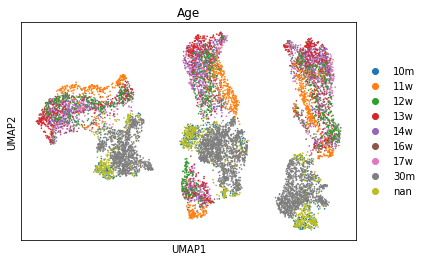

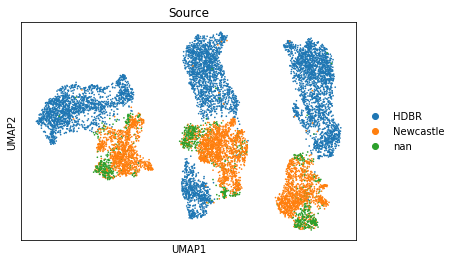

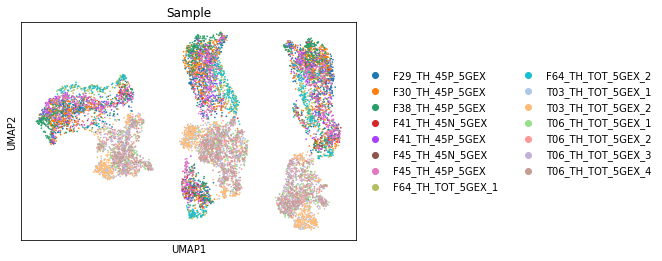

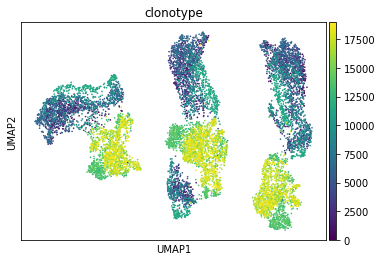

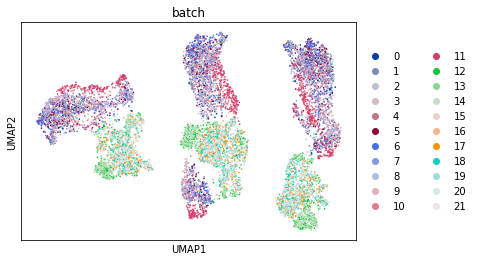

In [8]:
sc.tl.umap(latent_moe)
sc.pl.umap(latent_moe, color='Age')
sc.pl.umap(latent_moe, color='Source')
sc.pl.umap(latent_moe, color='Sample')
sc.pl.umap(latent_moe, color='clonotype')
sc.pl.umap(latent_moe, color='batch')

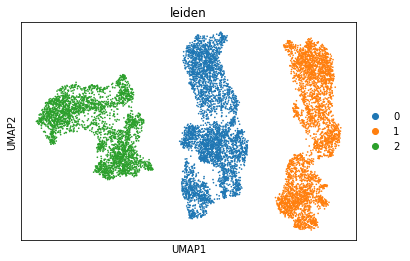

Index(['batch', 'clonotype', 'Age', 'Source', 'Sample', 'leiden'], dtype='object')

In [9]:
#sc.tl.leiden(latent_moe, resolution = 1)
sc.tl.leiden(latent_moe, resolution = 0.05)
sc.pl.umap(latent_moe, color = "leiden")
latent_moe.obs.columns

In [10]:
path_tcr_anno_A_B_with_gender = './data/09_tcr_annotation_A_B_with_gender_data.h5ad'
adata = sc.read(adata=adata, filename=path_tcr_anno_A_B_with_gender)

In [11]:
adata.obs['leiden'] = latent_moe.obs['leiden']

In [12]:
sc.write(adata=adata, filename = './data/10_data_with_leiden_weight1.h5ad')

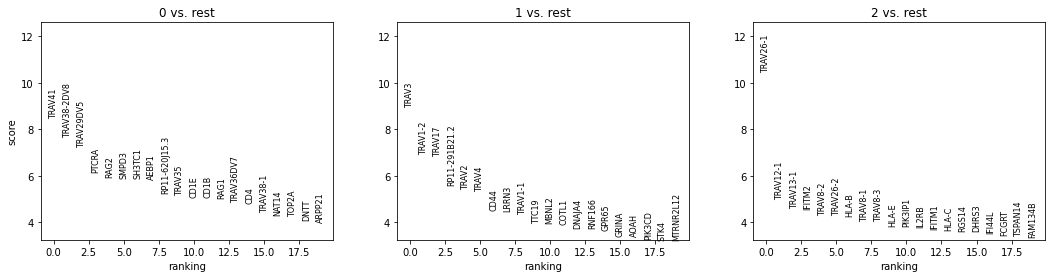

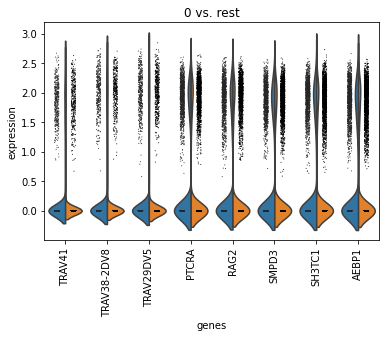

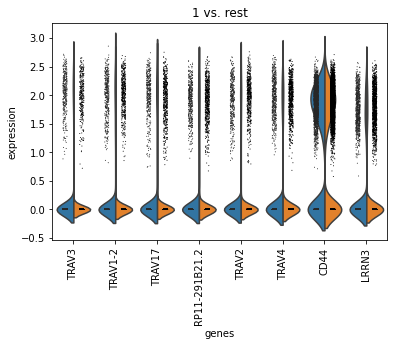

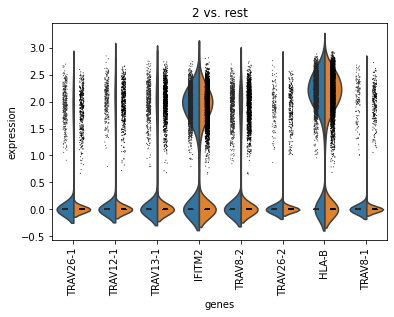

In [16]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata)
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)
sc.pl.rank_genes_groups_violin(adata, groups='1', n_genes=8)
sc.pl.rank_genes_groups_violin(adata, groups='2', n_genes=8)

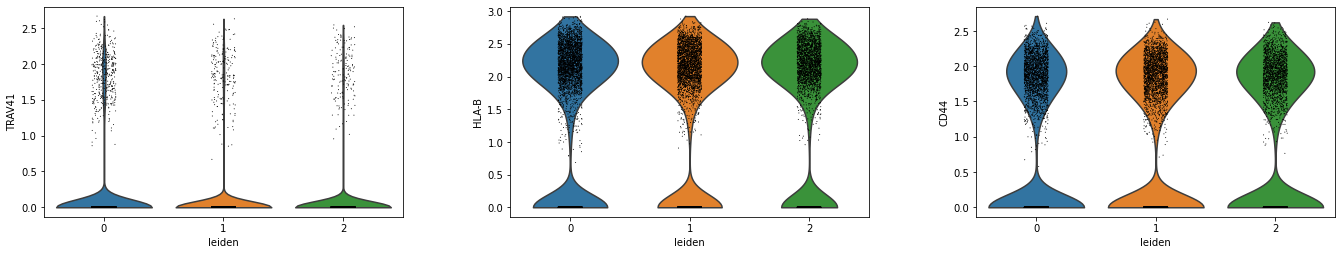

In [17]:
#Compare some genes
sc.pl.violin(adata, ['TRAV41', 'HLA-B', 'CD44'], groupby='leiden')

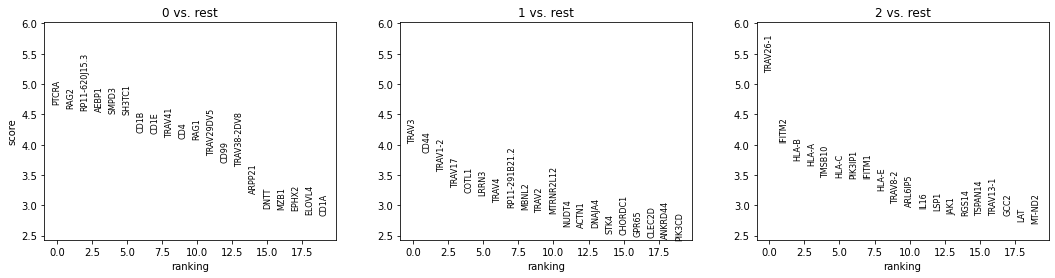

In [18]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata)

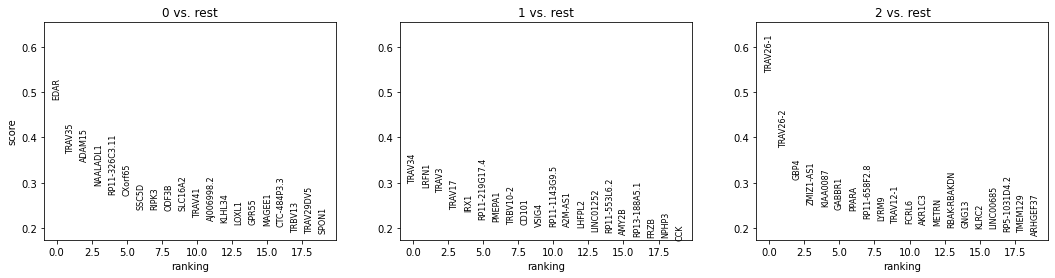

In [19]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata)

Model trained with weight 10

In [20]:
# Put the .h5ad file read below in a folder named 'data' and put the folder 'data' in the 'mvTCR' folder.
# This way you won't get an error from the utils.load_data function
adata = utils.load_data('09_tcr_annotation_A_B_with_gender_data.h5ad')
#Put the best_model_by_metric.pt file in the mvTCR folder
model = utils.load_model(adata, path_model = 'best_model_by_metric_weight10.pt')

In [21]:
latent_moe = model.get_latent(adata, metadata=['clonotype', 'Age', 'Source', 'Sample'], return_mean=True)

In [22]:
path = './data/latent_moe_weight10.h5ad'
sc.write(adata=latent_moe, filename=path)

In [23]:
latent_moe.obs.columns

Index(['batch', 'clonotype', 'Age', 'Source', 'Sample'], dtype='object')

In [24]:
sc.pp.neighbors(latent_moe, use_rep='X')

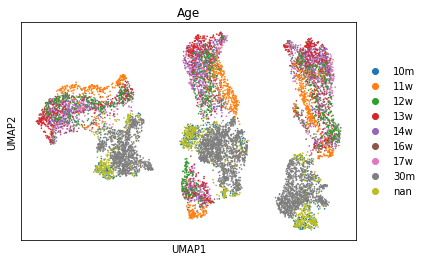

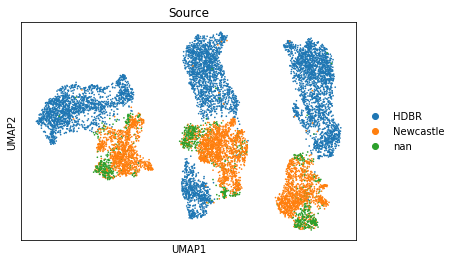

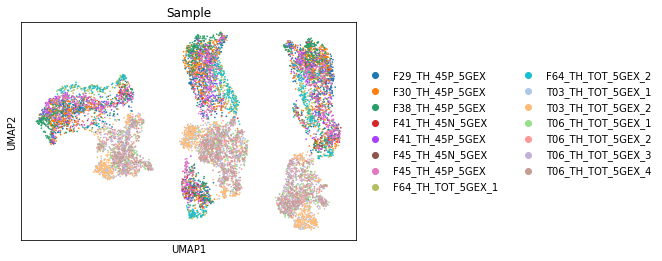

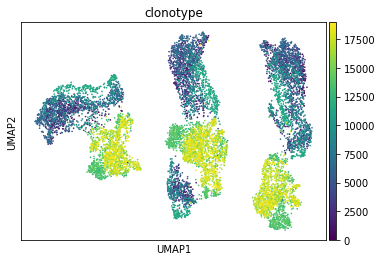

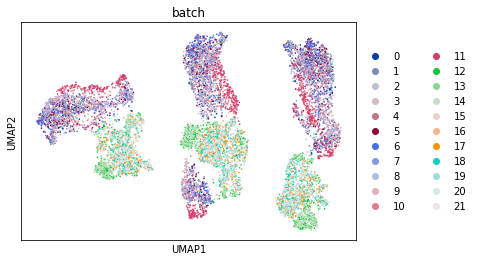

In [25]:
sc.tl.umap(latent_moe)
sc.pl.umap(latent_moe, color='Age')
sc.pl.umap(latent_moe, color='Source')
sc.pl.umap(latent_moe, color='Sample')
sc.pl.umap(latent_moe, color='clonotype')
sc.pl.umap(latent_moe, color='batch')

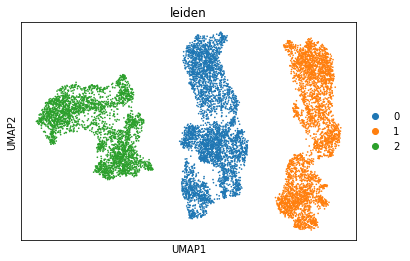

Index(['batch', 'clonotype', 'Age', 'Source', 'Sample', 'leiden'], dtype='object')

In [26]:
#sc.tl.leiden(latent_moe, resolution = 1)
sc.tl.leiden(latent_moe, resolution = 0.05)
sc.pl.umap(latent_moe, color = "leiden")
latent_moe.obs.columns

In [27]:
path_tcr_anno_A_B_with_gender = './data/09_tcr_annotation_A_B_with_gender_data.h5ad'
adata = sc.read(adata=adata, filename=path_tcr_anno_A_B_with_gender)

In [28]:
adata.obs['leiden'] = latent_moe.obs['leiden']

In [29]:
sc.write(adata=adata, filename = './data/10_data_with_leiden_weight10.h5ad')

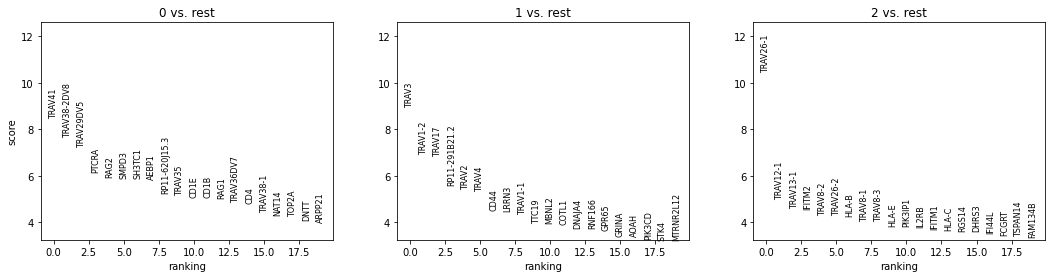

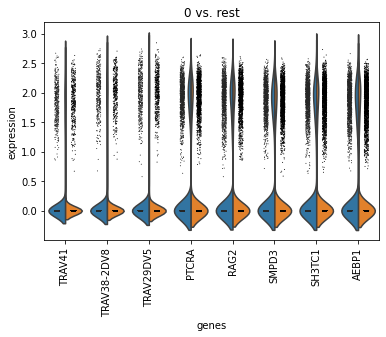

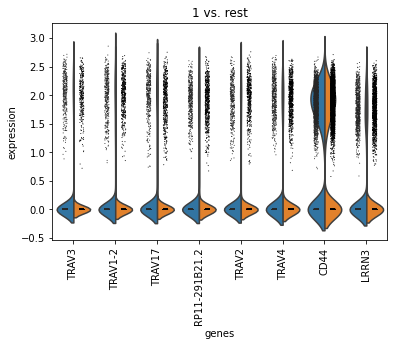

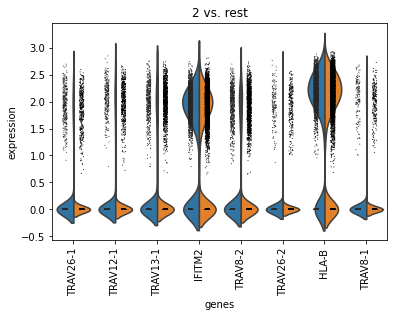

In [30]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata)
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)
sc.pl.rank_genes_groups_violin(adata, groups='1', n_genes=8)
sc.pl.rank_genes_groups_violin(adata, groups='2', n_genes=8)

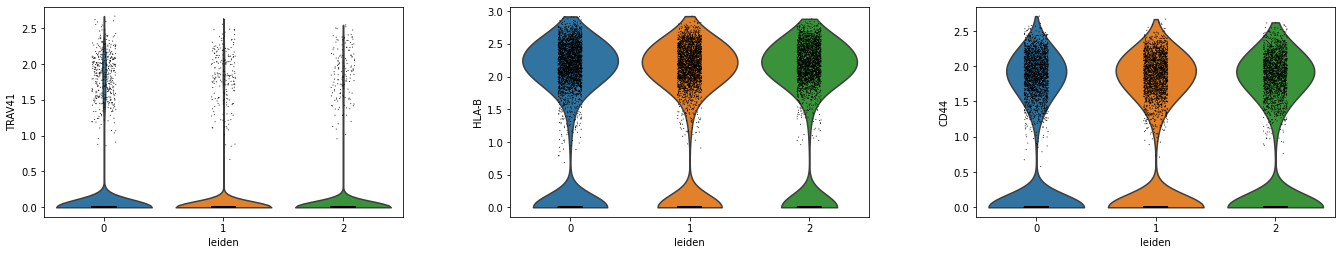

In [31]:
#Compare some genes
sc.pl.violin(adata, ['TRAV41', 'HLA-B', 'CD44'], groupby='leiden')

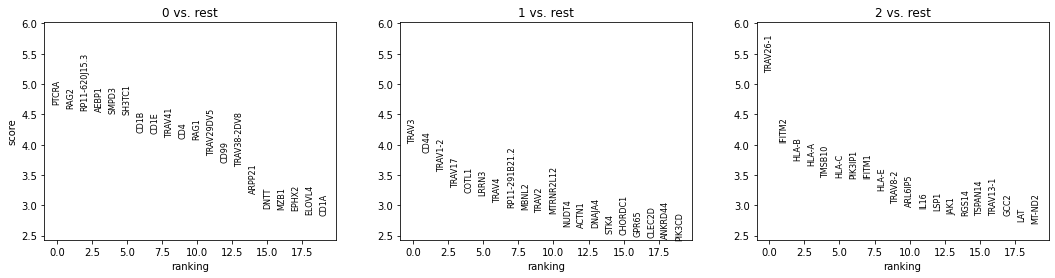

In [32]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata)

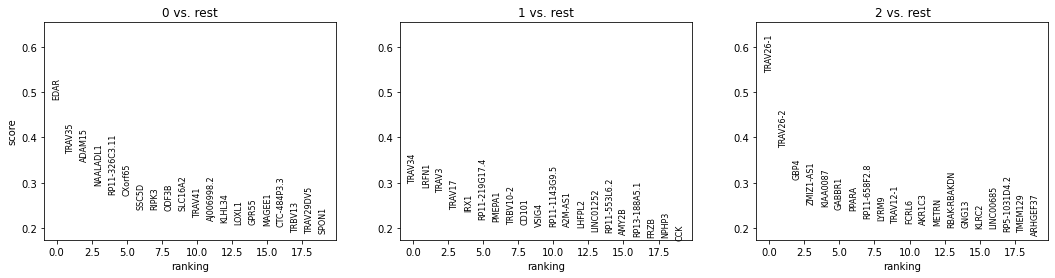

In [33]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata)